# Book Recommendation System: Collaborative Filtering

## Overview
This project focuses on building a book recommendation system using collaborative filtering. Collaborative filtering is a technique used in recommendation systems to predict user preferences by collecting preferences from many users. The goal is to recommend books to users based on their past interactions and similarities with other users.

## Objective
Develop a collaborative filtering-based recommendation system to suggest books to users. The project will cover the complete pipeline, including data loading, exploratory data analysis, data preparation, model building, evaluation, and visualization.

## Learning Outcomes
1. Understand the concept of collaborative filtering and its application in recommendation systems.
2. Learn to preprocess and analyze user-item interaction data.
3. Gain experience in building a user-item matrix and computing user similarities.
4. Implement a recommendation system using cosine similarity.
5. Evaluate the recommendation system using metrics like Mean Squared Error (MSE).
6. Visualize user similarities and analyze the most recommended books.

---

## Step 1: Define the Problem
### Task:
Understand the problem and its real-world implications. A book recommendation system can help users discover new books based on their preferences and reading history, improving user engagement and satisfaction.

### Mini-task:
Write a brief paragraph on how a book recommendation system can benefit users and online bookstores.

---

## Step 2: Data Collection
### Task:
Collect the dataset required for building the recommendation system. The dataset used in this project includes two files: `ratings.csv` and `books.csv`.

### Mini-task:
Load the dataset and inspect the first few rows to understand its structure.

#### Hint:
Use the `pandas` library to load the dataset and display the first 10 rows.

```python
import pandas as pd

# Load the dataset
ratings = pd.read_csv('ratings.csv')
books = pd.read_csv('books.csv')

# Display the first 10 rows of each dataset
### YOUR CODE HERE ###
```


---

In [1]:
# Install dependencies as needed:
!pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Load ratings.csv
ratings_df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "zygmunt/goodbooks-10k",
  "ratings.csv"
)

# Load books.csv
books_df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "zygmunt/goodbooks-10k",
  "books.csv"
)

print("First 10 records of ratings.csv:", ratings_df.head(10))
print("First 10 records of books.csv:", books_df.head(10))

<ipython-input-1-2649539573>:7: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  ratings_df = kagglehub.load_dataset(
<ipython-input-1-2649539573>:14: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  books_df = kagglehub.load_dataset(


First 10 records of ratings.csv:    book_id  user_id  rating
0        1      314       5
1        1      439       3
2        1      588       5
3        1     1169       4
4        1     1185       4
5        1     2077       4
6        1     2487       4
7        1     2900       5
8        1     3662       4
9        1     3922       5
First 10 records of books.csv:    id   book_id  best_book_id   work_id  books_count        isbn  \
0   1   2767052       2767052   2792775          272   439023483   
1   2         3             3   4640799          491   439554934   
2   3     41865         41865   3212258          226   316015849   
3   4      2657          2657   3275794          487    61120081   
4   5      4671          4671    245494         1356   743273567   
5   6  11870085      11870085  16827462          226   525478817   
6   7      5907          5907   1540236          969   618260307   
7   8      5107          5107   3036731          360   316769177   
8   9       960 

In [2]:
ratings_df.head(10)

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4
5,1,2077,4
6,1,2487,4
7,1,2900,5
8,1,3662,4
9,1,3922,5


In [3]:
sampled_ratings_df = ratings_df.sample(frac=0.1, random_state=42) # reducing the data

In [4]:
books_df.head(10)

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...
5,6,11870085,11870085,16827462,226,525478817,9.780525e+12,John Green,2012.0,The Fault in Our Stars,...,2346404,2478609,140739,47994,92723,327550,698471,1311871,https://images.gr-assets.com/books/1360206420m...,https://images.gr-assets.com/books/1360206420s...
6,7,5907,5907,1540236,969,618260307,9.780618e+12,J.R.R. Tolkien,1937.0,The Hobbit or There and Back Again,...,2071616,2196809,37653,46023,76784,288649,665635,1119718,https://images.gr-assets.com/books/1372847500m...,https://images.gr-assets.com/books/1372847500s...
7,8,5107,5107,3036731,360,316769177,9.780317e+12,J.D. Salinger,1951.0,The Catcher in the Rye,...,2044241,2120637,44920,109383,185520,455042,661516,709176,https://images.gr-assets.com/books/1398034300m...,https://images.gr-assets.com/books/1398034300s...
8,9,960,960,3338963,311,1416524797,9.781417e+12,Dan Brown,2000.0,Angels & Demons,...,2001311,2078754,25112,77841,145740,458429,716569,680175,https://images.gr-assets.com/books/1303390735m...,https://images.gr-assets.com/books/1303390735s...
9,10,1885,1885,3060926,3455,679783261,9.780680e+12,Jane Austen,1813.0,Pride and Prejudice,...,2035490,2191465,49152,54700,86485,284852,609755,1155673,https://images.gr-assets.com/books/1320399351m...,https://images.gr-assets.com/books/1320399351s...


## Step 3: Exploratory Data Analysis (EDA)
### Task:
Analyze the dataset to understand the distribution of book ratings, identify popular books, and explore user behavior.

### Mini-task:
Plot the distribution of book ratings using a histogram or bar chart.

#### Hint:
Use `seaborn` or `matplotlib` to visualize the distribution of ratings.

```python
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of book ratings
### YOUR CODE HERE ###
```

---

<ipython-input-5-594536656>:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


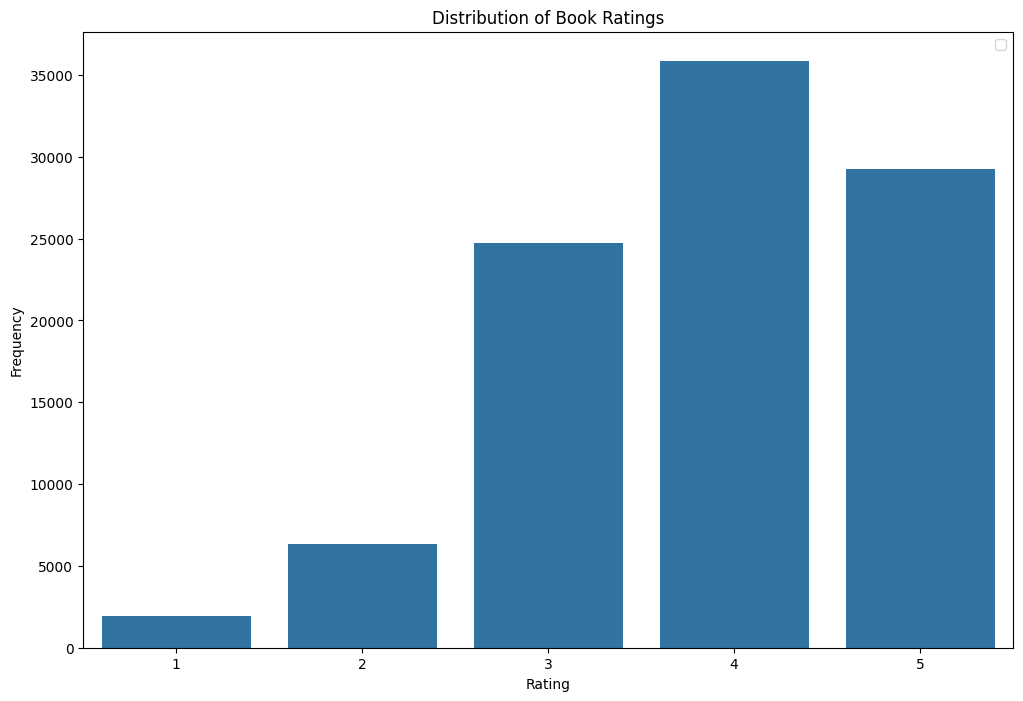

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt


#Plot the distribution of book ratings using a histogram
plt.figure(figsize=(12, 8)) # Adjust figure size as needed
sns.barplot(x=sampled_ratings_df['rating'].value_counts().index, y=sampled_ratings_df['rating'].value_counts().values) # Using histplot for histogram
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.legend()
plt.show()





In [6]:
# Install dependencies as needed:
!pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "zygmunt/goodbooks-10k",
  "ratings.csv",
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

<ipython-input-6-602377763>:7: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:    book_id  user_id  rating
0        1      314       5
1        1      439       3
2        1      588       5
3        1     1169       4
4        1     1185       4


In [7]:
df.head(10)

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4
5,1,2077,4
6,1,2487,4
7,1,2900,5
8,1,3662,4
9,1,3922,5


## Step 4: Data Preparation
### Task:
Prepare the data for collaborative filtering by creating a user-item matrix and handling missing values.

### Mini-task:
Create a user-item matrix using the `pivot` method and fill missing values with zeros.

#### Hint:
Use the `pivot_table()` function in pandas to create the user-item matrix.

```python
# Create a user-item matrix
### YOUR CODE HERE ###
```

---

In [8]:
# Create a user-item matrix
user_item_matrix = sampled_ratings_df.pivot_table(index='user_id', columns='book_id', values='rating')

## Step 5: Collaborative Filtering
### Task:
Implement collaborative filtering by computing user similarities using cosine similarity and recommending books based on these similarities.

### Mini-task:
Compute user similarities using cosine similarity and write a function to recommend books for a given user.

#### Hint:
Use `cosine_similarity` from `sklearn.metrics.pairwise` to compute user similarities.

```python
from sklearn.metrics.pairwise import cosine_similarity

# Compute user similarities
### YOUR CODE HERE ###

# Write a function to recommend books for a given user
### YOUR CODE HERE ###
```

---

In [9]:
from sklearn.metrics.pairwise import cosine_similarity
# compute user similarities
user_similarities = cosine_similarity(user_item_matrix.fillna(0))

# Write a function to recommend books for a given user
def collaborative_filltering(user_id, sampled_ratings_df):
    """
    recomends books to a user based on raatings from similar ratings.

    Args:
    user_id (int): Id of the user for whom recommendations are made.
    sampled_ratings_df (DataFrame): DataFrame containing user ratings.

    Return:
    list: List of recommended books
    """
    # User matrix
    user_item_matrix = user_item_matrix

    # Compute user similarities
    user_similarities =  user_similarities

    #finding the index of a given user
    user_index = list(user_item_matrix.index).index(user_name)

    #getting similarity scores for a given user
    user_similarities_scores =list(enumerate(user_similarities[user_index]))

    # Sorting scores in descending order and selecting top 2 similar users
    user_similarities_scores = sorted(user_similarities_scores, key=lambda x: x[1], reverse=True)[1:3]

    # Getting the names of similar users
    similar_users = [user_item_matrix.index[i[0]] for i in user_similarities_scores]

    # Finding movies liked by similar users but not rated by the given user
    recommendations = sampled_ratings_df[
        sampled_ratings_df['user_id'].isin(similar_users) &
        ~sampled_ratings_df['book_id'].isin(sampled_ratings_df[ratings_df['user_id'] == user_name]['book_id'])
    ]

    # Returning the titles of the recommended movies
    return recommendations['book_id'].unique()




## Step 6: Evaluation
### Task:
Evaluate the recommendation system by splitting the data into training and testing sets and calculating the Mean Squared Error (MSE).

### Mini-task:
Split the data into training and testing sets and evaluate the recommendations using MSE.

#### Hint:
Use `train_test_split` from `sklearn.model_selection` to split the data and `mean_squared_error` from `sklearn.metrics` to calculate MSE.

```python
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
### YOUR CODE HERE ###

# Evaluate the recommendations using MSE
### YOUR CODE HERE ###
```

---

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd # Import pandas
train_df, test_df = train_test_split(sampled_ratings_df, random_state=42)

# user item matrix
training_user_item_matrix = train_df.pivot_table(index='user_id', columns='book_id', values='rating')

#user similarities
training_user_similarities = cosine_similarity(training_user_item_matrix.fillna(0))

# Write a function to recommend books for a given user
def trained_collaborative_filltering(user_id, train_df):
    """
    recomends books to a user based on raatings from similar ratings.

    Args:
    user_id (int): Id of the user for whom recommendations are made.
    train_df (DataFrame): DataFrame containing user ratings.

    Return:
    list: List of recommended books
    """
    # User matrix
    user_item_matrix = training_user_item_matrix

    # Compute user similarities
    user_similarities = training_user_similarities

    #finding the index of a given user
    try:
      user_index = list(user_item_matrix.index).index(user_id)
    except ValueError:
      return [] # Return empty list if user_id is not in the training set


    #getting similarity scores for a given user
    user_similarities_scores =list(enumerate(user_similarities[user_index]))

    # Sorting scores in descending order and selecting top 2 similar users
    user_similarities_scores = sorted(user_similarities_scores, key=lambda x: x[1], reverse=True)[1:3]

    # Getting the names of similar users
    similar_users = [user_item_matrix.index[i[0]] for i in user_similarities_scores]

    # Finding movies liked by similar users but not rated by the given user
    recommendations = train_df[
        train_df['user_id'].isin(similar_users) &
        ~train_df['book_id'].isin(train_df[train_df['user_id'] == user_id]['book_id'])
    ]

    # Returning the titles of the recommended movies
    return recommendations['book_id'].unique()

# Evaluate the recommendations using MSE
# Get actual ratings from the test set
actual_ratings = test_df['rating']

# Get predicted ratings (for simplicity, we'll use the average rating of recommended books)
predicted_ratings = []
for index, row in test_df.iterrows():
    user_id = row['user_id']
    book_id = row['book_id']
    recommended_books = trained_collaborative_filltering(user_id, train_df)
    if book_id in recommended_books:
        # If the book was recommended, use the average rating of that book in the training set as the prediction
        avg_rating = train_df[train_df['book_id'] == book_id]['rating'].mean()
        predicted_ratings.append(avg_rating if not pd.isna(avg_rating) else 0) # Handle NaN case
    else:
        # If the book was not recommended, predict 0 (or could use a global average)
        predicted_ratings.append(0)

# Calculate MSE
mse = mean_squared_error(actual_ratings, predicted_ratings)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 15.804313311816198


## Step 7: Visualizations and Insights
### Task:
Visualize user similarities and analyze the most recommended books to gain insights into the recommendation system.

### Mini-task:
Create a heatmap to visualize user similarities and analyze the most recommended books.

#### Hint:
Use `seaborn.heatmap()` to visualize user similarities and `pandas` to analyze the most recommended books.

```python
# Create a heatmap to visualize user similarities
### YOUR CODE HERE ###

# Analyze the most recommended books
### YOUR CODE HERE ###
```

---

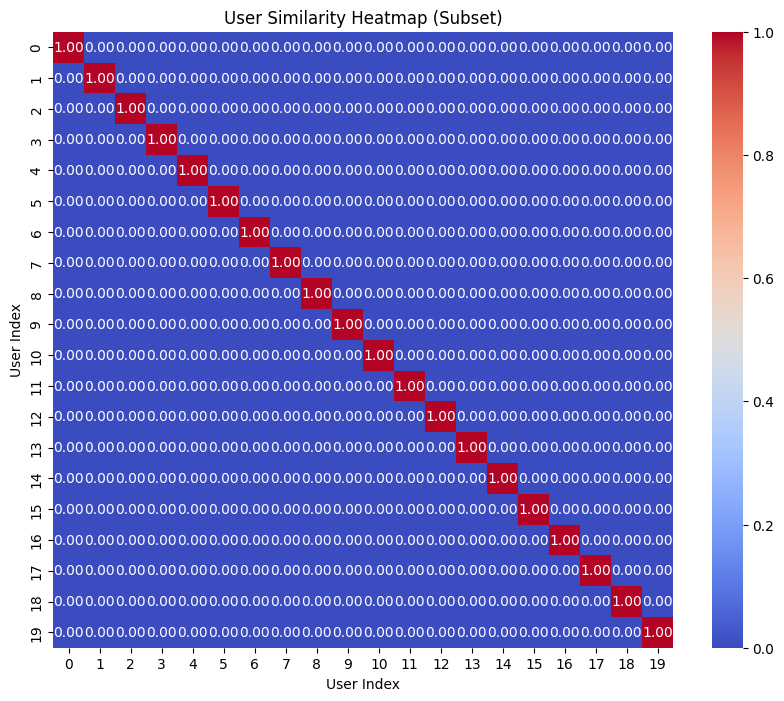


Most Recommended Books:


,book_id,recommendation_count,title
0,1991,17,NaN
1,8432,16,NaN
2,6152,15,NaN
3,6444,15,NaN
4,8189,14,NaN
5,1908,14,NaN
6,2192,14,NaN
7,1019,13,NaN
8,6101,13,NaN
9,939,11,NaN


In [11]:
 # Create a heatmap to visualize user similarities
plt.figure(figsize=(10, 8))
sns.heatmap(user_similarities[:20, :20], annot=True, cmap='coolwarm', fmt=".2f") # Using the first 20 users for visualization
plt.title('User Similarity Heatmap (Subset)')
plt.xlabel('User Index')
plt.ylabel('User Index')
plt.show()

# Analyze the most recommended books
# We can count the frequency of each book_id in the recommendations generated for all users in the test set
all_recommended_books = []
for user_id in test_df['user_id'].unique():
    recommended_books = trained_collaborative_filltering(user_id, train_df)
    all_recommended_books.extend(recommended_books)

recommended_books_counts = pd.Series(all_recommended_books).value_counts().reset_index()
recommended_books_counts.columns = ['book_id', 'recommendation_count']

# Merge with the books_df to get book titles
most_recommended_books = recommended_books_counts.merge(books_df[['book_id', 'title']], on='book_id', how='left')

print("\nMost Recommended Books:")
display(most_recommended_books.head(10))


## Considerations
**What are some key takeaways you learned from this project?**
- Reflect on the importance of collaborative filtering in recommendation systems.
- Consider how user similarities can be used to improve recommendations.

**How would you share your findings with a team?**
- Prepare a presentation with visualizations and key insights.
- Discuss the impact of user similarities on book recommendations.

**What would you share with and recommend to stakeholders?**
- Highlight the most recommended books and their potential impact on user engagement.
- Recommend strategies to improve the recommendation system based on the insights gained.

## Key Takeaways from the Book Recommendation Project

*   **Collaborative Filtering is powerful:** This project demonstrates how collaborative filtering can effectively recommend books by leveraging user-item interaction data.
*   **User similarities are crucial:** By finding users with similar rating patterns, we can predict preferences for unrated books, leading to personalized recommendations.
*   **Data preparation is essential:** Creating a user-item matrix and handling missing values were necessary steps to prepare the data for the collaborative filtering algorithm.
*   **Evaluation is important:** Using metrics like MSE helps to quantify the performance of the recommendation system and identify areas for improvement.
*   **Visualization aids understanding:** Heatmaps of user similarities and lists of most recommended books provide valuable insights into the system's behavior and results.

## Sharing Findings with a Team

To share your findings with a team, you could:

*   **Prepare a presentation:** Include an overview of the project, the methodology (collaborative filtering), key steps (data loading, EDA, data preparation, model building, evaluation), and the results.
*   **Use visualizations:** Present the distribution of ratings, user similarity heatmap, and the list of most recommended books to illustrate your findings.
*   **Discuss the impact:** Explain how user similarities were used to generate recommendations and the implications of the MSE score.
*   **Share the code:** Make the notebook available for the team to review and understand the implementation details.

## Sharing with and Recommending to Stakeholders

When communicating with stakeholders, focus on the business value and potential impact:

*   **Highlight the most recommended books:** Showcase the top recommended titles and discuss why they are being recommended (e.g., popular among similar users). Explain how recommending these books could increase user engagement and potentially drive sales.
*   **Present the system's performance:** Briefly explain the evaluation metric (MSE) and what it signifies about the system's accuracy.
*   **Recommend future strategies:** Based on your insights, suggest ways to improve the recommendation system, such as:
    *   Collecting more user feedback (ratings, reviews, purchase history).
    *   Exploring other collaborative filtering techniques or hybrid approaches.
    *   Implementing A/B testing to measure the impact of recommendations on key business metrics.
    *   Addressing the cold-start problem for new users and books.